<h1>Quantum Teleportation</h1>
<h3 style="text-align: left;">This is<em> Alices's</em> side of the quantum teleportation protocol.</h3>
<h4><span style="color: #ff0000;">It has to be executed second.</span></h4>
<p style="text-align: left;">The general procedure is: Alice prepares the Bell state, does here part of the teleportation protocol and sends these qubits to Bob.</p>
<p style="text-align: left;">Bob then needs to do the controlled gates on his qubits. As qiskit does not support measurements within the middle of the program, the controlled gates also need to be done via quantum communication.</p>
<p style="text-align: left;">For the communication we introduce two channel qubits, qubit 2 and 3. Alice prepared state is on qubit 0, the shared Bell state is on qubits 1 and 4.</p>

In [1]:
from qiskit import *

from channel_class import Channel

<h3 style="text-align: left;">Initialisation</h3>
In the following is the configuration of the overall protocoll. 
In the future, it should be possible to omit this.

In [2]:
n_master = 2  # two qubits, the one on alice side
n_channel = 2
n_slave = 1 # two quantum channels and one qubit on bobs side
slave_offset = n_master

In [3]:
channel = Channel(slave_offset, 5000, remote_port = 5001)

RUNNNN... port = 5000


<h3 style="text-align: left;">Preparation of the initial state</h3>

In [4]:
#create a Quantum circuit
circ = QuantumCircuit(n_master + n_channel + n_slave)

## Master, Oracle
circ.rx(0.234,0 + channel._offset)
circ.rz(0.54,0 + channel._offset)
circ.ry(0.94,0 + channel._offset)
circ.rx(0.1,0 + channel._offset)

<h3 style="text-align: left;">Preparation of the Bell state</h3>

In [5]:
## Creating Entaglement now on Bobs side
circ.h(1+channel._offset)
circ.cx(1+channel._offset,4+channel._offset)

<h3 style="text-align: left;">Teleportation Protocol</h3>

In [6]:
## Master, teleportation protocol
circ.cx(0 + channel._offset, 1  + channel._offset)
circ.h(0 + channel._offset)

In [7]:
## Write the result on the communication qubits, this should be done with classical communication at some point
circ.cx(0 + channel._offset, 2  + channel._offset)
circ.cx(1 + channel._offset, 3  + channel._offset)


<h3 style="text-align: left;">Send Qubits</h3>

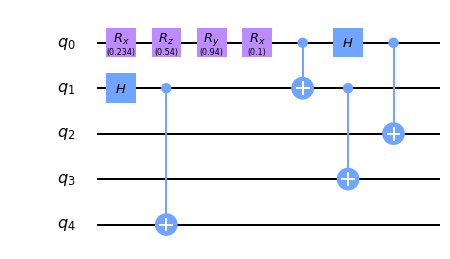

In [8]:
## Alice sends here qubits to Bob
channel.send(circ,[1])  ## TODO: remove

## The circuit how it looks on Alice side
circ.draw()